## Configure sweep on 10 MW turbine with specified shear/veer rates

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
import numpy as np
from wrf_io import *
from scipy.io import savemat
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
fontsize = 24
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 

plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

In [4]:
opt_params={}

opt_params['allocation']      = 'ATM170028' 
opt_params['partition']       = 'spr' 
opt_params['runtime']         = '12:00:00'
opt_params['system']          = 'stampede'
opt_params['num_nodes']       = 2
 
opt_params['exclude_time']    = 7
opt_params['save_interval']   = 10
 
opt_params['base_dir']        = '/scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train'
 
opt_params['gp_dir']          = '/scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/'

opt_params['field_data_path'] = '/scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/'

opt_params['wrf_path']        = '/work2/09909/smata/stampede3/WRF_LES'
opt_params['template_path']   = '/scratch/09909/smata/wrf_les_sweep/templates'
opt_params['turb_model']      = 'iea10MW'
opt_params['rotor_model']     = 'GAD'
opt_params['slice_loc']       = 1
    
opt_params['print_table']     = True
    
opt_params['plot_outer']      = True
opt_params['save_outer']      = False
opt_params['outer_align']     = False
    
opt_params['plot_inner']      = True
opt_params['save_inner']      = False
    
opt_params['save_both']       = False
opt_params['outer_pad']       = 75
 
opt_params['plot_profiles']   = True
opt_params['save_profiles']   = True
 
opt_params['batch_submit']    = True
 
opt_params['prof_type']       = 'Idealized'
opt_params['shear_type']      = 'Rate'
 
# Train 
opt_params['shear']           = [-0.025,-0.015,0,0.015,0.025]
opt_params['veer']            = [-0.2,-0.13,-0.067,0,0.067,0.13,0.2]
 
opt_params['Ufst']            = 7
 
opt_params['excluded_pairs']  = []

# with open('/scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train/gad_sweep/opt_params.pkl', 'wb') as f:
#     pickle.dump(opt_params, f)

In [5]:
train_data = gpr.generate_train_data(opt_params, D=199, field_data = True)

allocation      : ATM170028
partition       : spr
runtime         : 12:00:00
system          : stampede
num_nodes       : 2
exclude_time    : 7
save_interval   : 10
base_dir        : /scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train
gp_dir          : /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/
field_data_path : /scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/
wrf_path        : /work2/09909/smata/stampede3/WRF_LES
template_path   : /scratch/09909/smata/wrf_les_sweep/templates
turb_model      : iea10MW
rotor_model     : GAD
slice_loc       : 1
print_table     : True
plot_outer      : True
save_outer      : False
outer_align     : False
plot_inner      : True
save_inner      : False
save_both       : False
outer_pad       : 75
plot_profiles   : True
save_profiles   : True
batch_submit    : True
prof_type       : Idealized
shear_type      : Rate
shear           : [-0.025, -0.015, 0, 0.015, 0.025]
veer            : [-0.

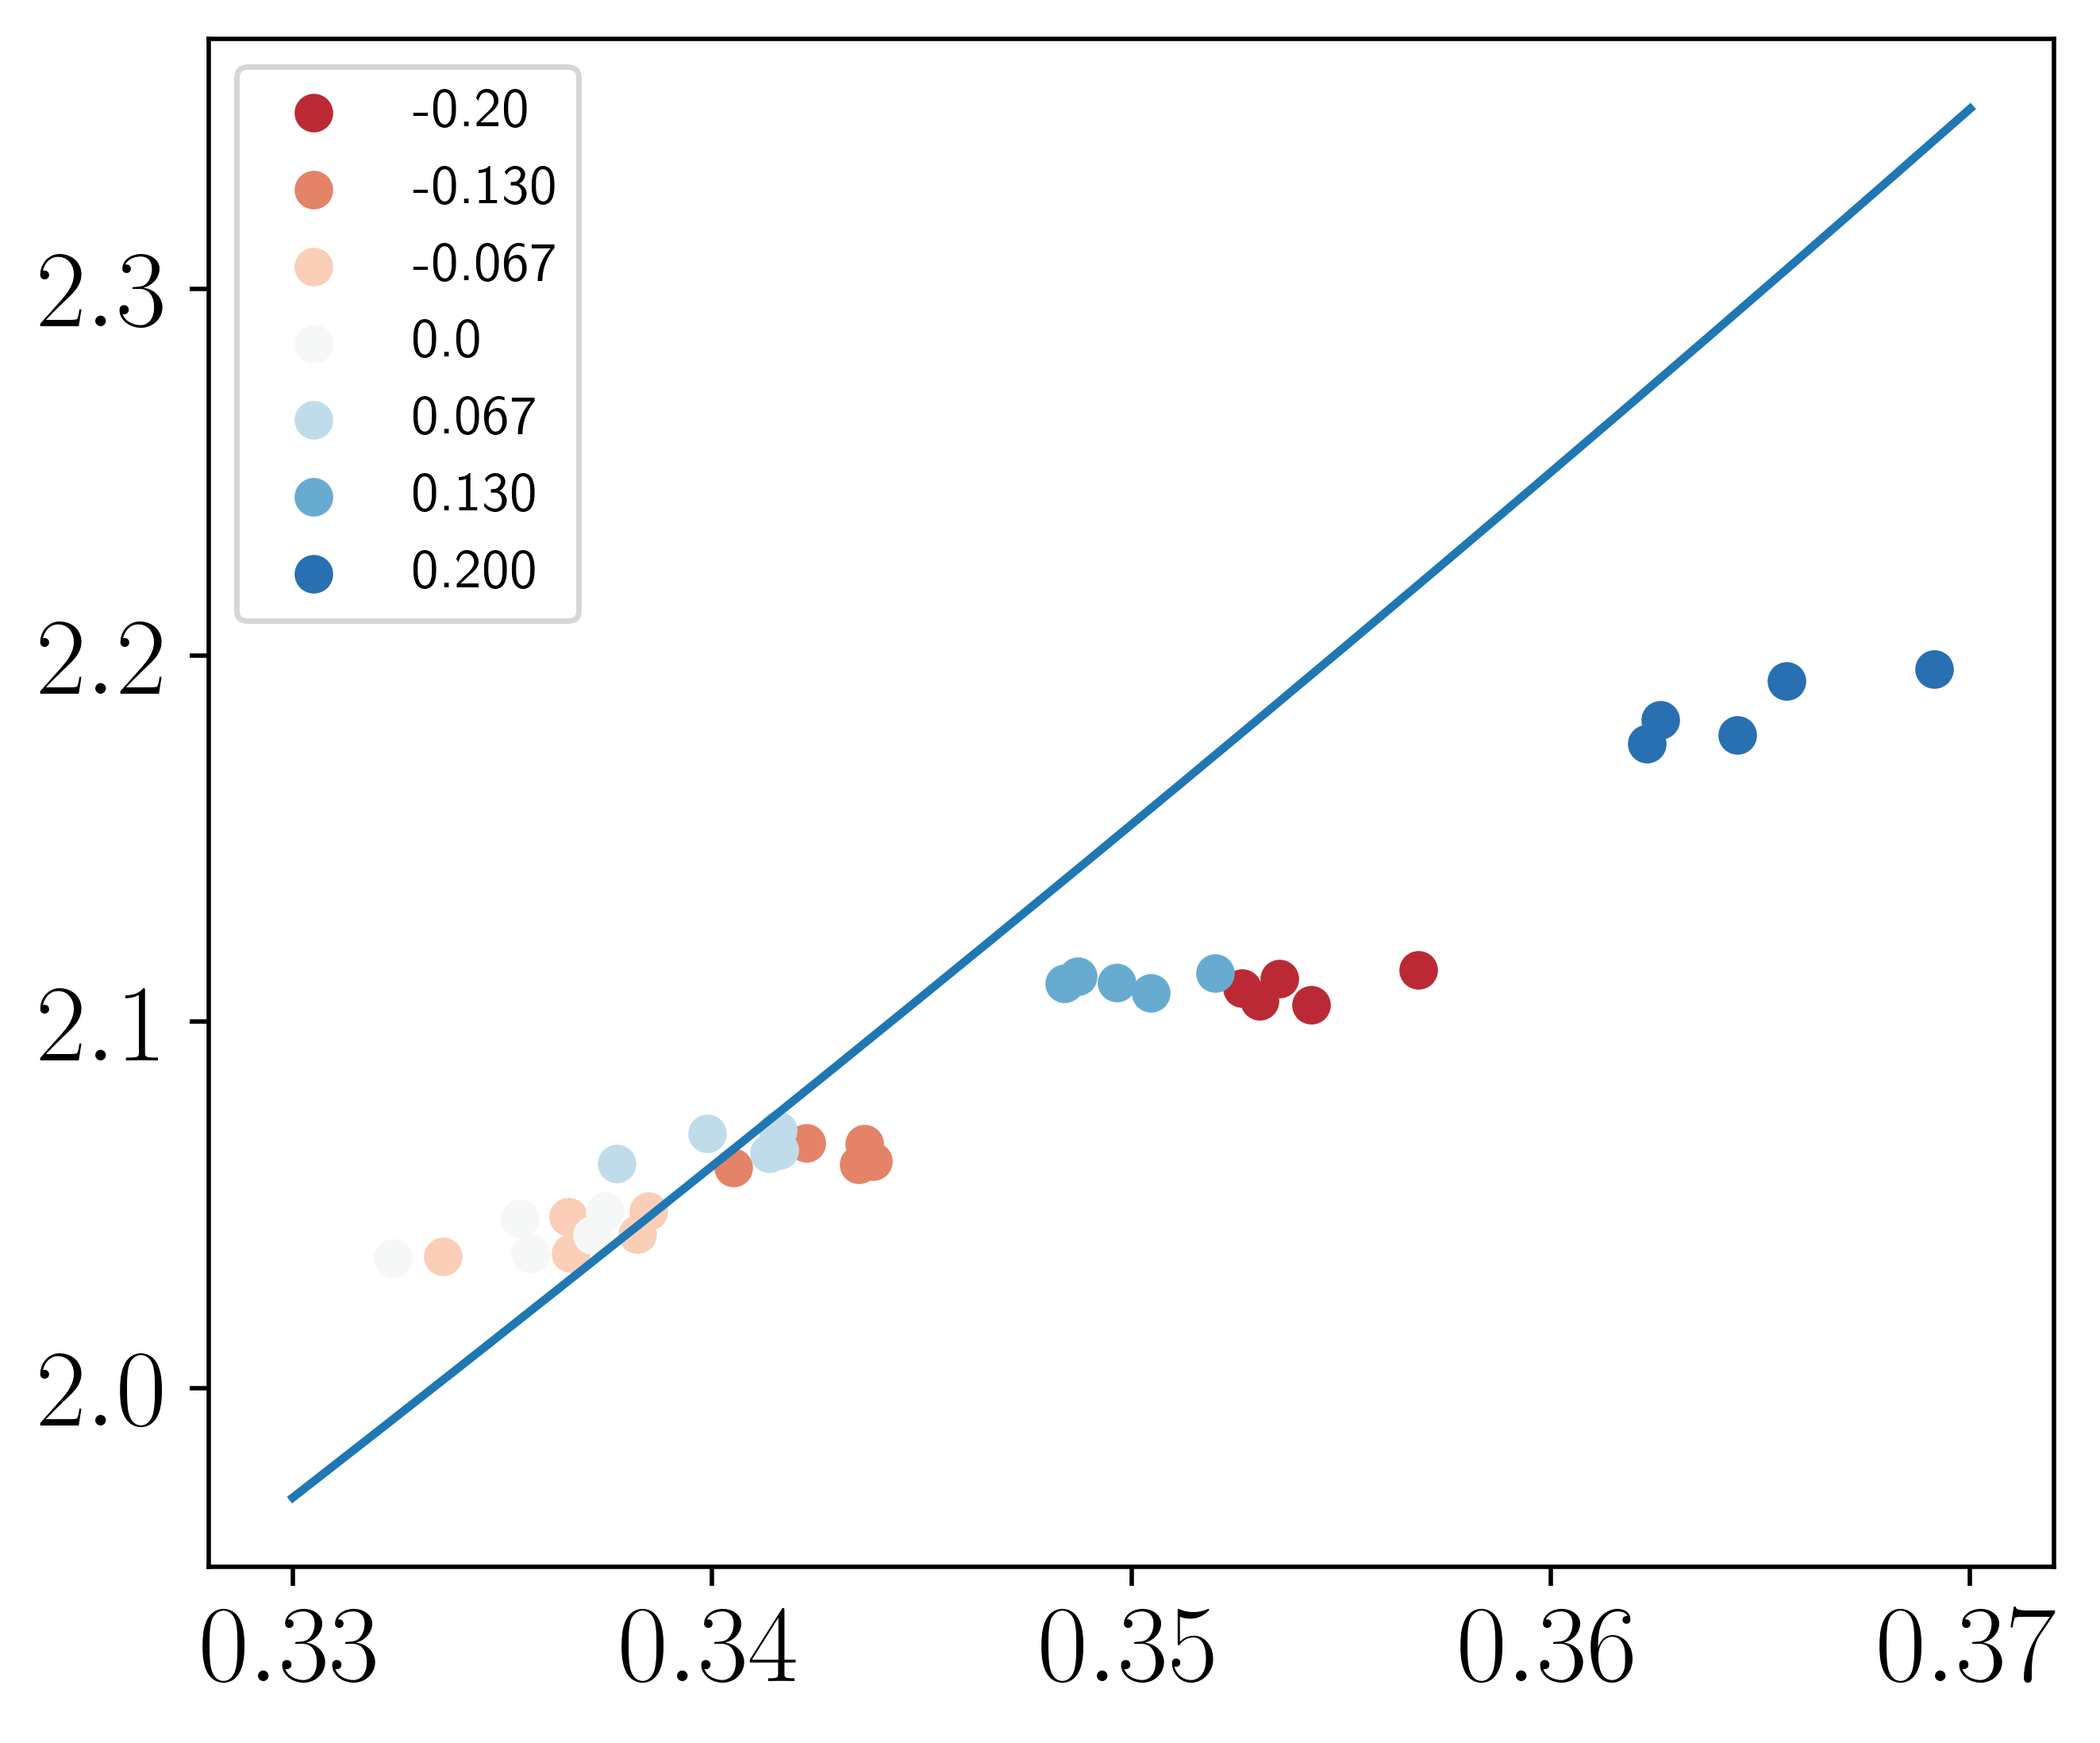

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))


a = np.linspace(0.33,0.37,20)
CT_formula = 4 * a / (1 - a)

veer_n200 = [0,7,14,21,28]
veer_n130 = [1,8,15,22,29]
veer_n067 = [2,9,16,23,30]
veer_000  = [3,10,17,24,31]
veer_067  = [4,11,18,25,32]
veer_130  = [5,12,19,26,33]
veer_200  = [6,13,20,27,34]

ax.plot(a,CT_formula)

ax.scatter(train_data['ind_rotor'][veer_n200], train_data['cotp_rotor'][veer_n200],color=veer_pallette[0],label='-0.20')
ax.scatter(train_data['ind_rotor'][veer_n130], train_data['cotp_rotor'][veer_n130],color=veer_pallette[1],label='-0.130')
ax.scatter(train_data['ind_rotor'][veer_n067], train_data['cotp_rotor'][veer_n067],color=veer_pallette[2],label='-0.067')
ax.scatter(train_data['ind_rotor'][veer_000],  train_data['cotp_rotor'][veer_000], color=veer_pallette[3],label='0.0')
ax.scatter(train_data['ind_rotor'][veer_067],  train_data['cotp_rotor'][veer_067], color=veer_pallette[4],label='0.067')
ax.scatter(train_data['ind_rotor'][veer_130],  train_data['cotp_rotor'][veer_130], color=veer_pallette[5],label='0.130')
ax.scatter(train_data['ind_rotor'][veer_200],  train_data['cotp_rotor'][veer_200], color=veer_pallette[6],label='0.200')

ax.legend()

In [7]:
rotor_data = gpr.generate_train_data(opt_params, D=199, rotor_data=True)

allocation      : ATM170028
partition       : spr
runtime         : 12:00:00
system          : stampede
num_nodes       : 2
exclude_time    : 7
save_interval   : 10
base_dir        : /scratch/09909/smata/wrf_les_sweep/runs/10MW/rate/train
gp_dir          : /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/
field_data_path : /scratch/09909/smata/induction_modeling/madsen_modeling/rotorAvg_10MW/processedData/
wrf_path        : /work2/09909/smata/stampede3/WRF_LES
template_path   : /scratch/09909/smata/wrf_les_sweep/templates
turb_model      : iea10MW
rotor_model     : GAD
slice_loc       : 1
print_table     : True
plot_outer      : True
save_outer      : False
outer_align     : False
plot_inner      : True
save_inner      : False
save_both       : False
outer_pad       : 75
plot_profiles   : True
save_profiles   : True
batch_submit    : True
prof_type       : Idealized
shear_type      : Rate
shear           : [-0.025, -0.015, 0, 0.015, 0.025]
veer            : [-0.

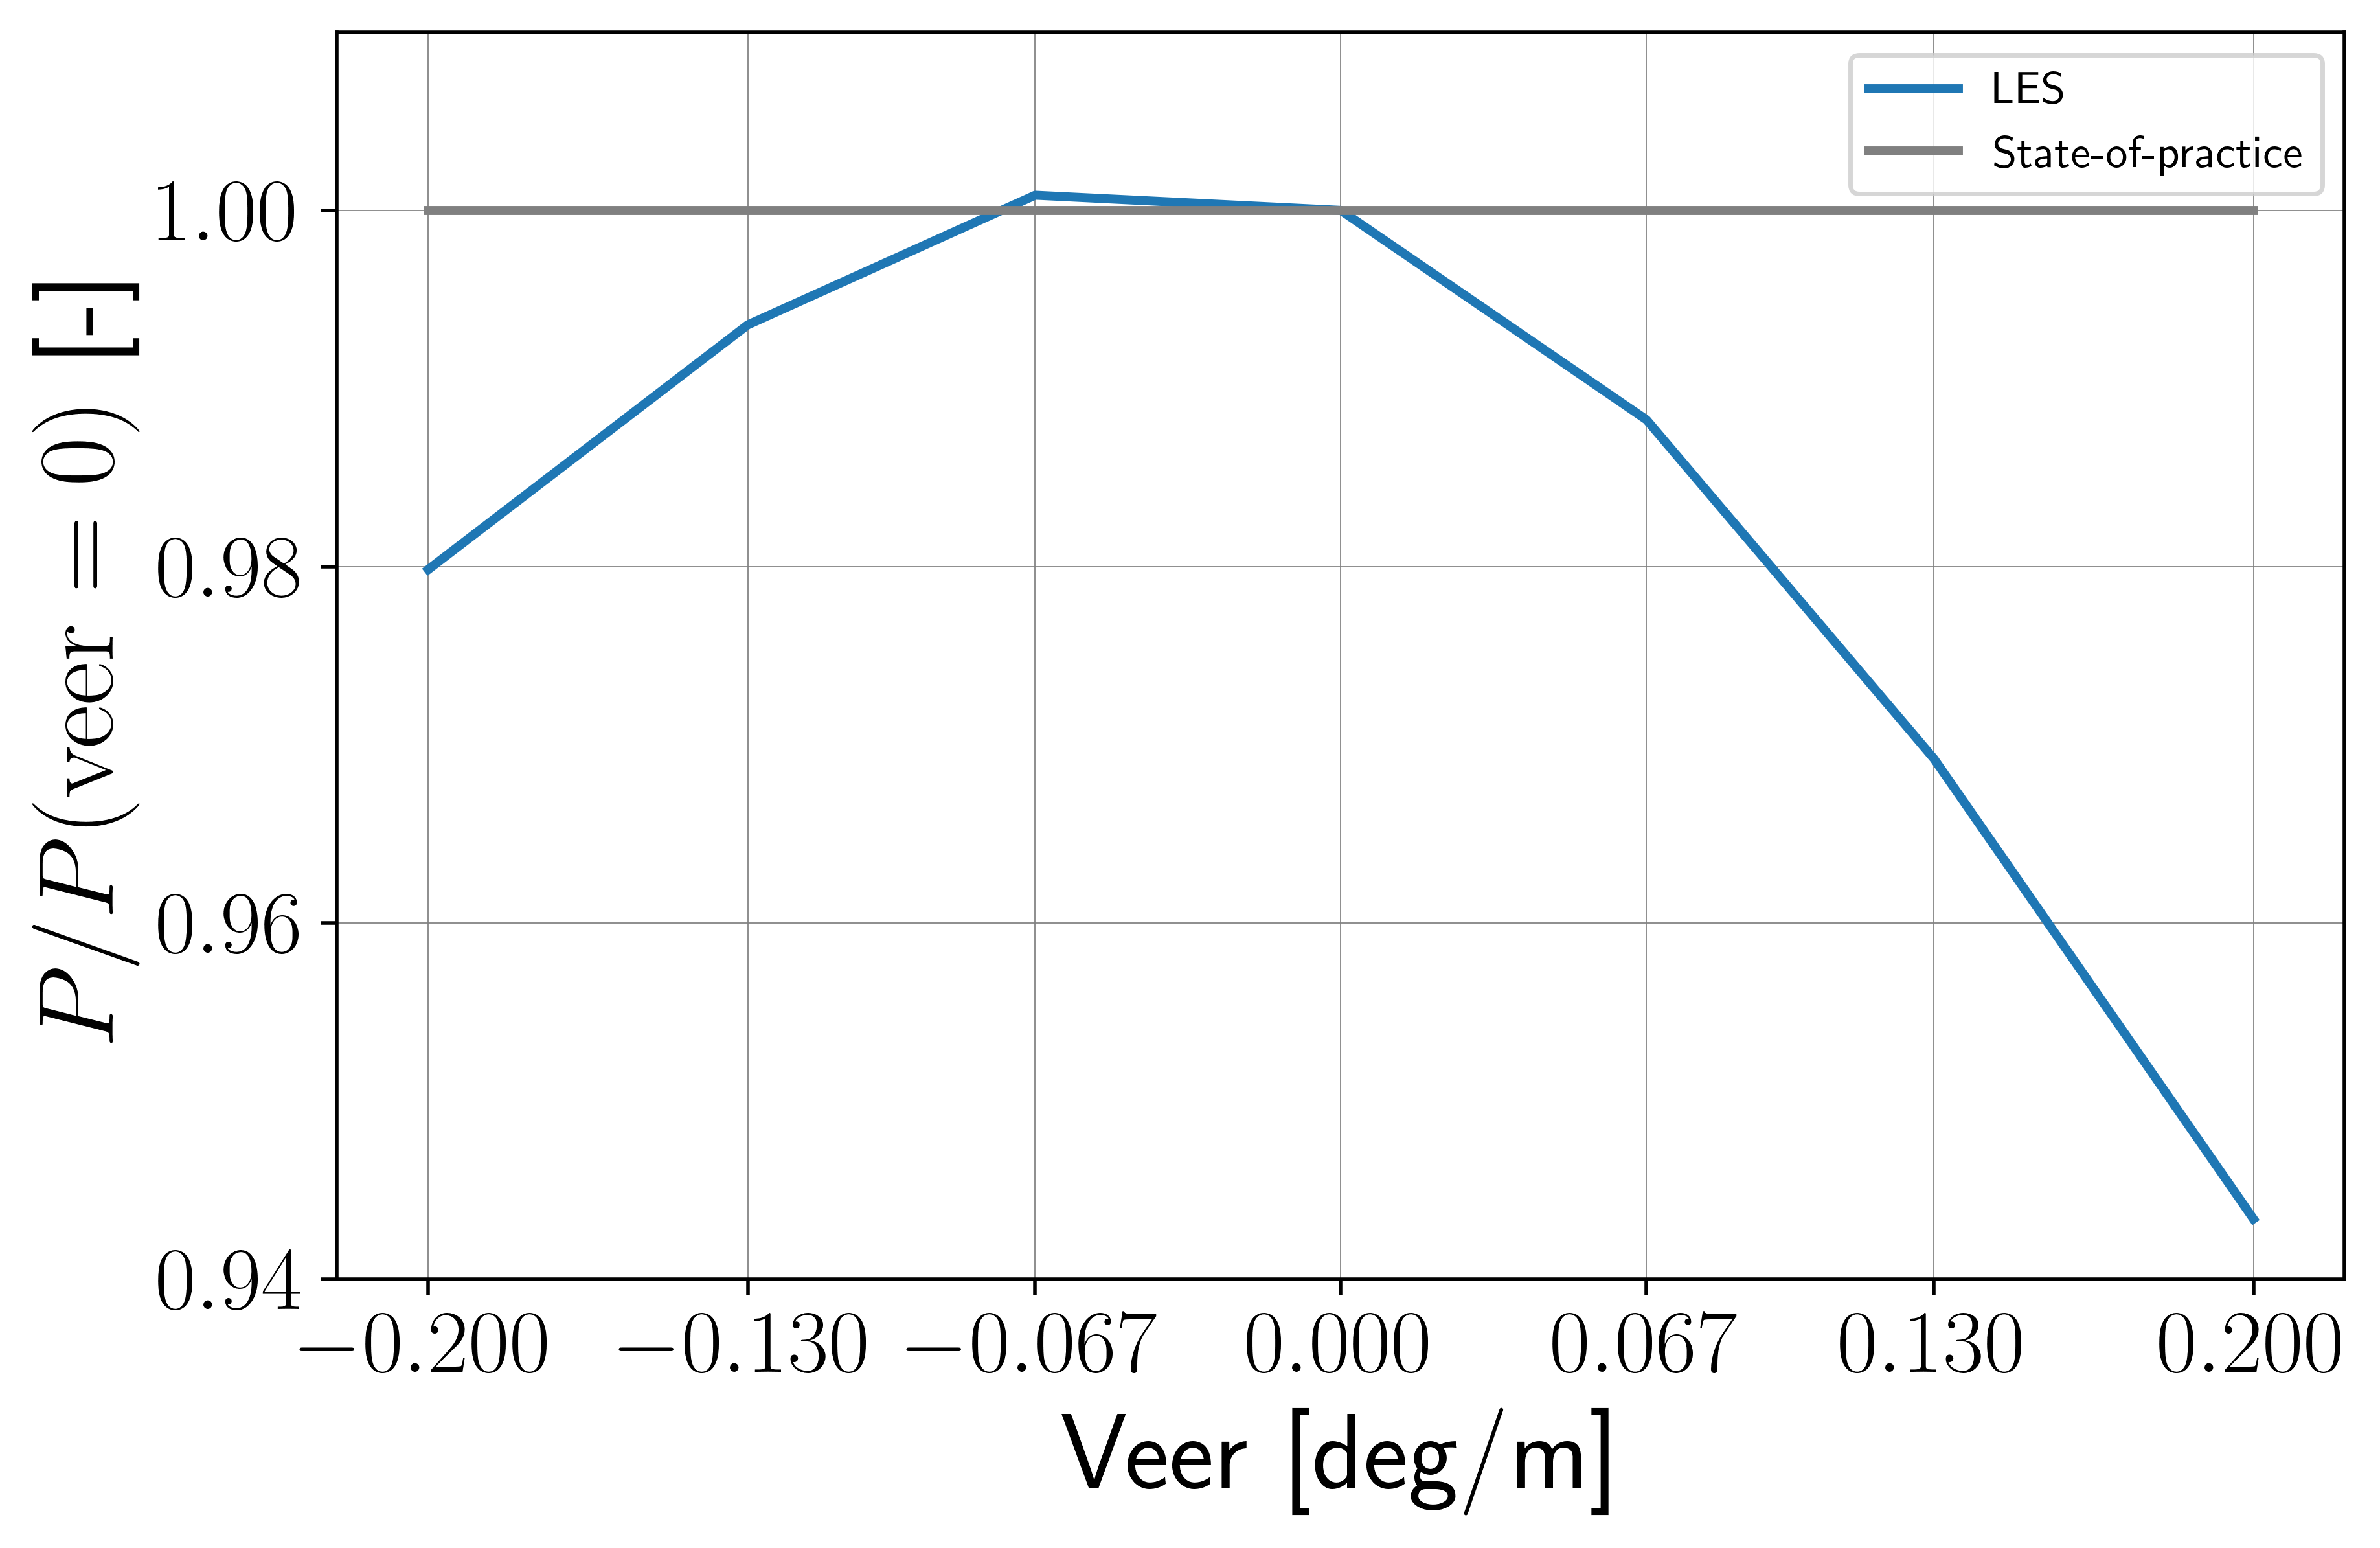

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

veer_train = [-0.2,-0.13,-0.067,0.0,0.067,0.13,0.2] 

uniform = 17
shear_000  = [14,15,16,17,18,19,20]

ax.plot(veer_train,rotor_data['power'][shear_000]/rotor_data['power'][uniform],linestyle='-',label='LES', linewidth=2)
ax.plot([veer_train[0], veer_train[-1]],[1,1],linestyle='-', color='grey', label='State-of-practice', linewidth=2)

# ax.axhline(1, color='grey', linestyle='--', linewidth=0.25)  # horizontal dashed grey line

ax.grid(True,color = "grey", linewidth = "0.25")

ax.set_ylabel('$P/P(\\textrm{veer}=0)$ [-]', fontsize=fontsize)
ax.set_xlabel('Veer [deg/m]', fontsize=fontsize)

ax.legend()

ax.set_ylim([0.94,1.01])

ax.set_xticks(veer_train)

plt.show()

In [7]:
import seaborn as sns
veer_pallette  = sns.color_palette("RdBu", as_cmap=False, n_colors=7)
shear_pallette = sns.color_palette("PRGn", as_cmap=False, n_colors=5)

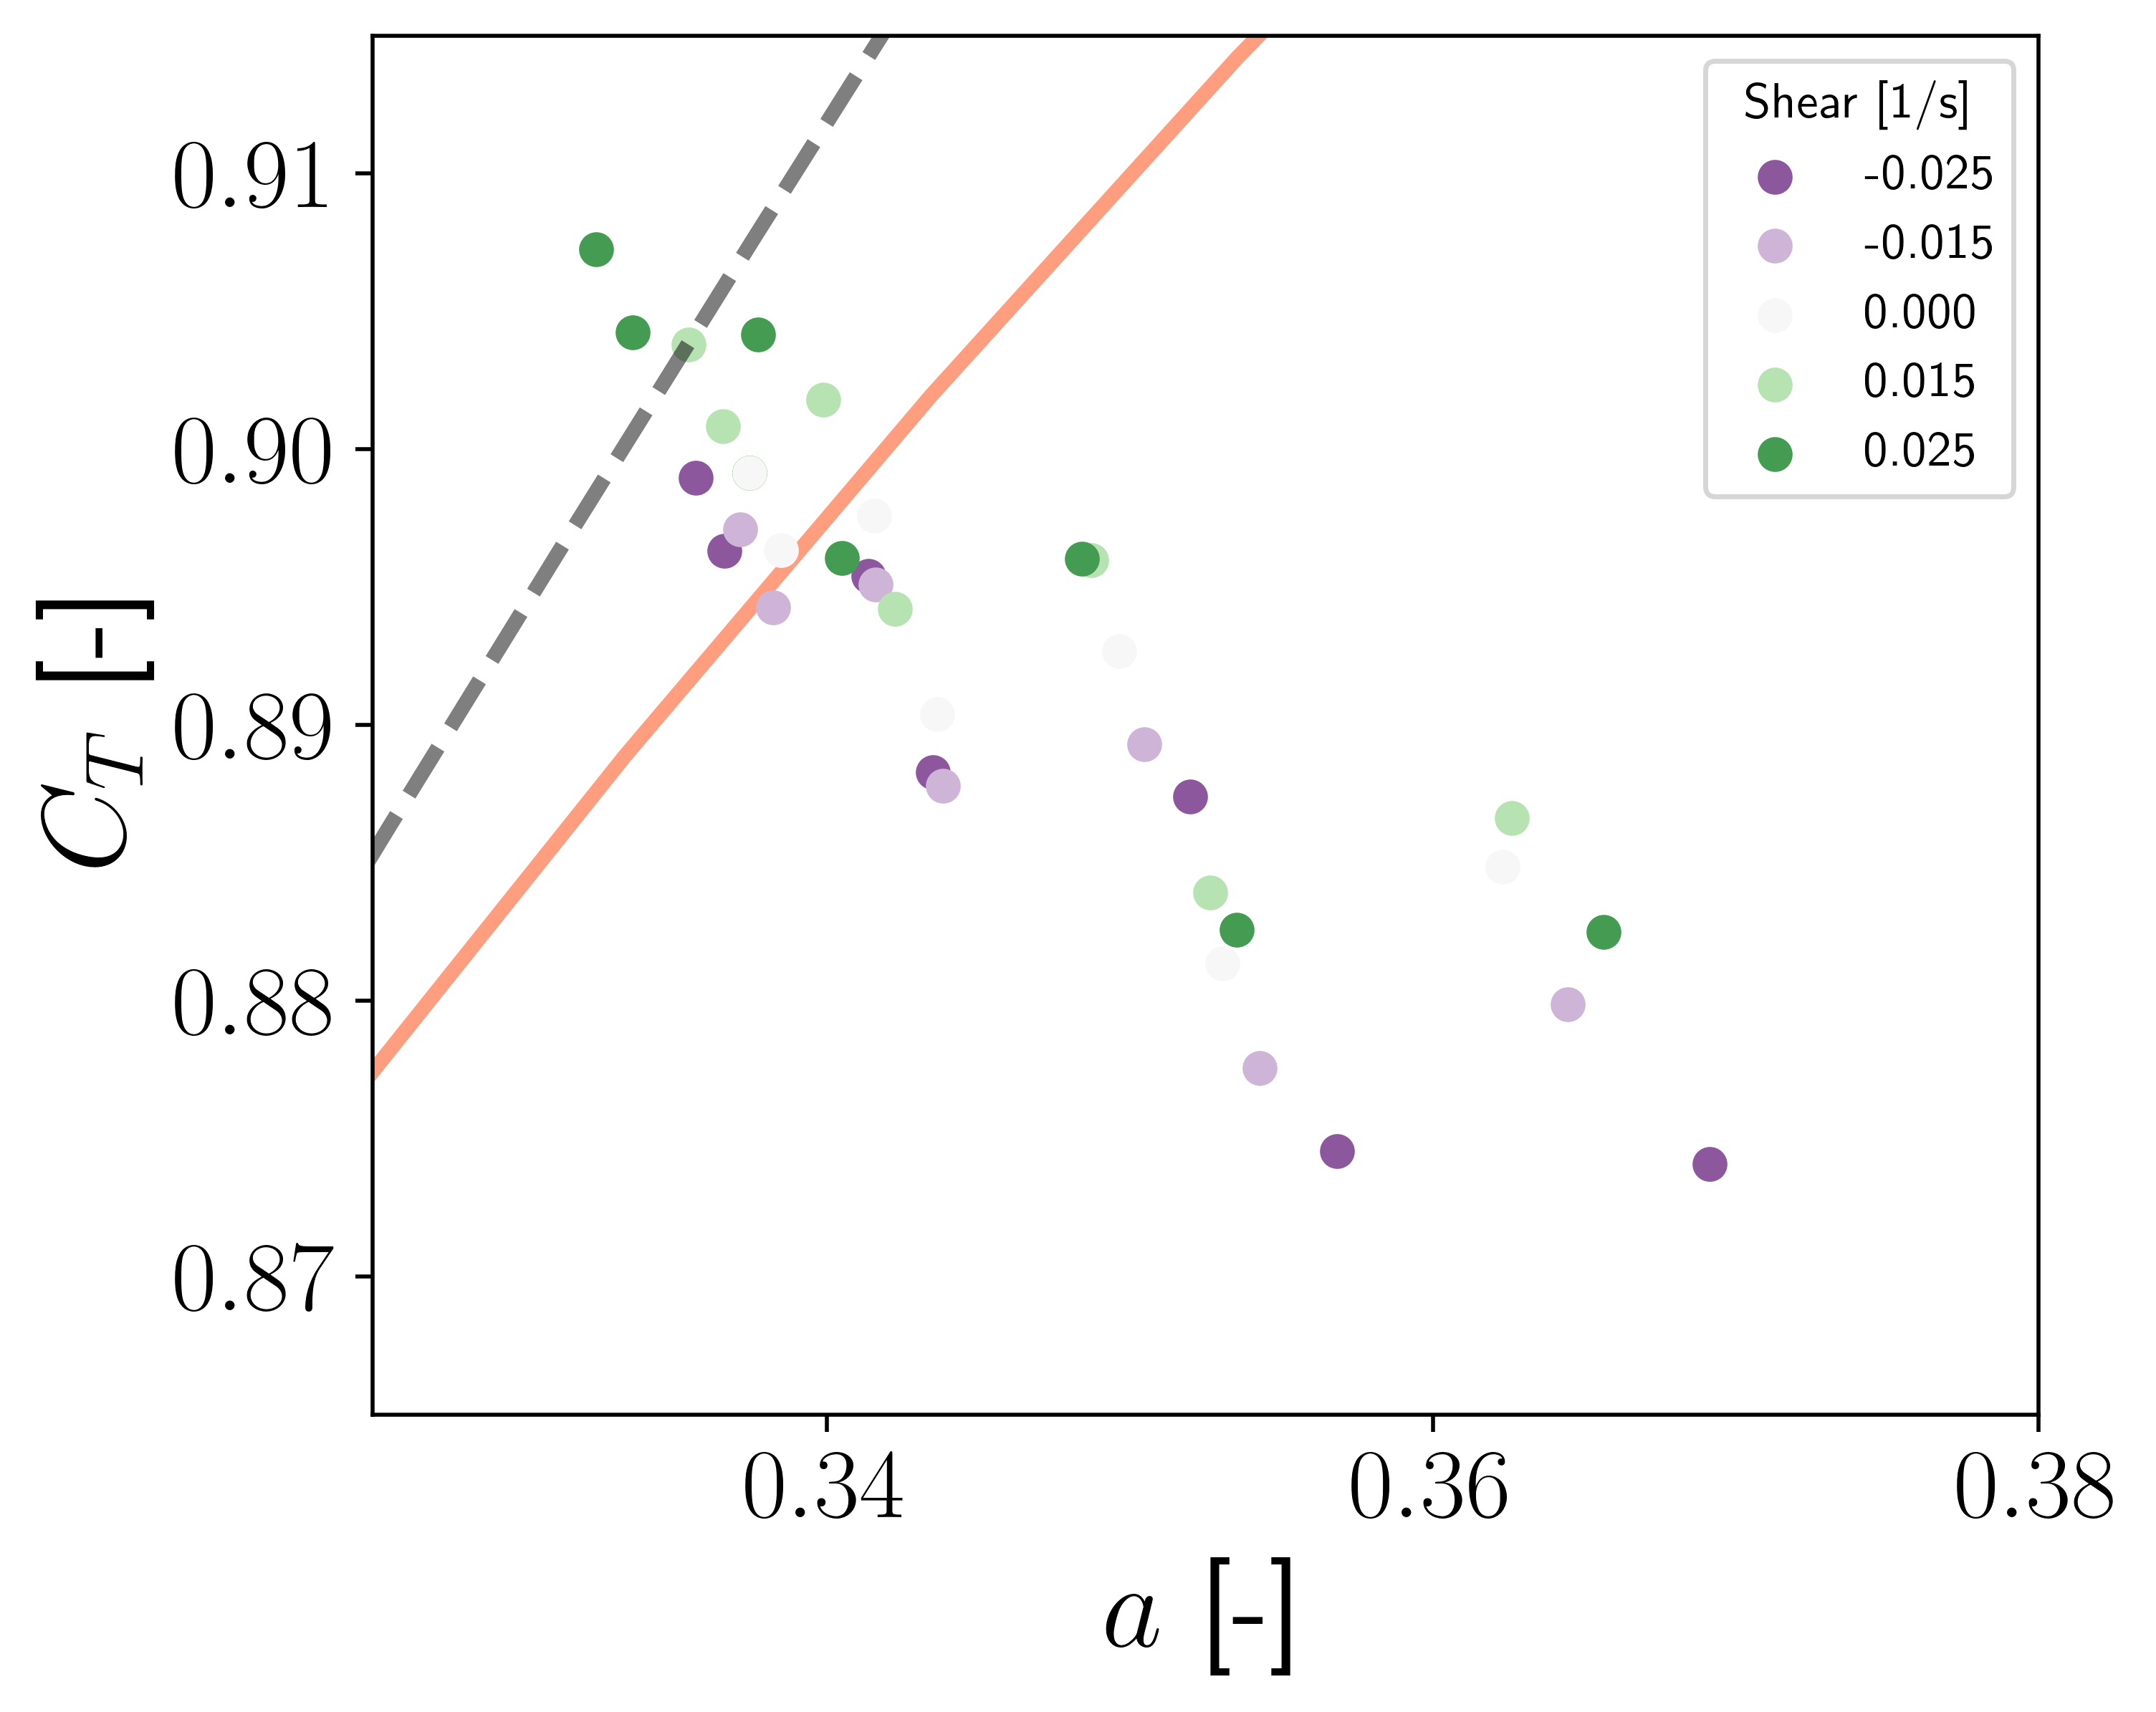

In [22]:
fig, ax = plt.subplots(figsize=(6, 5))

a_mad, ct_mad = postproc.madsen_ref()
a_mom, ct_mom = postproc.classical_ref()

veer_n200 = [0,7,14,21,28]
veer_n130 = [1,8,15,22,29]
veer_n067 = [2,9,16,23,30]
veer_000  = [3,10,17,24,31]
veer_067  = [4,11,18,25,32]
veer_130  = [5,12,19,26,33]
veer_200  = [6,13,20,27,34]

shear_n025 = [ 0, 1, 2, 3, 4, 5, 6]
shear_n015 = [ 7, 8, 9,10,11,12,13]
shear_000  = [14,15,16,17,18,19,20]
shear_015  = [21,22,23,24,25,26,27]
shear_025  = [28,29,30,31,32,33,34]

uniform = 17

ax.plot(a_mom, ct_mom, '#ff3c00',linewidth=3,alpha = 0.5, zorder = 1)
ax.plot(a_mad, ct_mad, 'k--',linewidth=3,alpha=0.5,zorder=2)

# ax.scatter(train_data['ind_rotor'], train_data['cot_rotor'])


# ax.scatter(train_data['ind_rotor'][uniform], train_data['cot_rotor'][uniform],color='green',label='')
# ax.scatter(train_data['ind_rotor'][veer_n200], train_data['cot_rotor'][veer_n200],color=veer_pallette[0],label='-0.200')
# ax.scatter(train_data['ind_rotor'][veer_n130], train_data['cot_rotor'][veer_n130],color=veer_pallette[1],label='-0.130')
# ax.scatter(train_data['ind_rotor'][veer_n067], train_data['cot_rotor'][veer_n067],color=veer_pallette[2],label='-0.067')
# ax.scatter(train_data['ind_rotor'][veer_067],  train_data['cot_rotor'][veer_067], color=veer_pallette[4],label='0.067')
# ax.scatter(train_data['ind_rotor'][veer_130],  train_data['cot_rotor'][veer_130], color=veer_pallette[5],label='0.130')
# ax.scatter(train_data['ind_rotor'][veer_200],  train_data['cot_rotor'][veer_200], color=veer_pallette[6],label='0.200')
# plt.legend(title='Veer [deg/m]')

ax.scatter(train_data['ind_rotor'][uniform], train_data['cot_rotor'][uniform],color='green',label='')
ax.scatter(train_data['ind_rotor'][shear_n025], train_data['cot_rotor'][shear_n025],color=shear_pallette[0],label='-0.025')
ax.scatter(train_data['ind_rotor'][shear_n015], train_data['cot_rotor'][shear_n015],color=shear_pallette[1],label='-0.015')
ax.scatter(train_data['ind_rotor'][shear_000],  train_data['cot_rotor'][shear_000], color=shear_pallette[2],label='0.000')
ax.scatter(train_data['ind_rotor'][shear_015],  train_data['cot_rotor'][shear_015], color=shear_pallette[3],label='0.015')
ax.scatter(train_data['ind_rotor'][shear_025],  train_data['cot_rotor'][shear_025], color=shear_pallette[4],label='0.025')
plt.legend(title='Shear [1/s]')


ax.set_xlabel('$a$ [-]', fontsize=fontsize)
ax.set_ylabel('$C_T$ [-]', fontsize=fontsize)

# ax.set_xlim([0,0.75])
# ax.set_ylim([0,1.5])

ax.set_xlim([0.325,0.38])
ax.set_ylim([0.865,0.915])

plt.show()

In [25]:
gpr.print_stats(train_data)

Variable Statistics:
---------------------------------------------------------------------------
Name                 |       Mean |    Std Dev |        Min |        Max
---------------------------------------------------------------------------
r_annulus            |   50.95000 |   28.01478 |    4.01833 |   97.88167
cot_local            |    0.89653 |    0.39821 |    0.09028 |    1.58945
ind_local            |    0.32935 |    0.12719 |   -0.03939 |    0.71595
cot_annulus          |    0.89653 |    0.38869 |    0.11385 |    1.38283
ind_annulus          |    0.32935 |    0.12149 |    0.01015 |    0.51623
cot_rotor            |    0.89196 |    0.00862 |    0.87408 |    0.90726
ind_rotor            |    0.34632 |    0.00993 |    0.33238 |    0.36914
shears_rotor         |   -0.00000 |    0.01844 |   -0.02500 |    0.02500
veers_rotor          |   -0.00000 |    0.13244 |   -0.20000 |    0.20000
shears_annulus       |    0.00000 |    0.01844 |   -0.02500 |    0.02500
veers_annulus        |  

In [27]:
# Compute shear regime, generate scalars, and standardize
training_data, scalars = gpr.scale_and_encode(train_data, training=True)

cot_local: scaler trained with 1 features
ind_local: scaler trained with 1 features
cot_annulus: scaler trained with 1 features
ind_annulus: scaler trained with 1 features
cot_rotor: scaler trained with 1 features
ind_rotor: scaler trained with 1 features
shears_rotor: scaler trained with 1 features
veers_rotor: scaler trained with 1 features
shears_annulus: scaler trained with 1 features
veers_annulus: scaler trained with 1 features
cotp_rotor: scaler trained with 1 features


In [28]:
gpr.print_stats(training_data)

Variable Statistics:
---------------------------------------------------------------------------
Name                 |       Mean |    Std Dev |        Min |        Max
---------------------------------------------------------------------------
shear_regime_rotor   |    0.25000 |    0.43301 |    0.00000 |    1.00000
shear_regime_annulus |    0.25000 |    0.43301 |    0.00000 |    1.00000
r_annulus            |   50.95000 |   28.01478 |    4.01833 |   97.88167
cot_local            |   -0.00000 |    1.00000 |   -2.02470 |    1.74009
ind_local            |    0.00000 |    1.00000 |   -2.89913 |    3.03954
cot_annulus          |   -0.00000 |    1.00000 |   -2.01364 |    1.25112
ind_annulus          |   -0.00000 |    1.00000 |   -2.62746 |    1.53827
cot_rotor            |   -0.00000 |    1.00000 |   -2.07442 |    1.77621
ind_rotor            |   -0.00000 |    1.00000 |   -1.40382 |    2.29942
shears_rotor         |   -0.00000 |    1.00000 |   -1.35582 |    1.35582
veers_rotor          |  

In [32]:
# Generate MATLAB tables of standardized inputs

X_rot = np.column_stack([training_data['cotp_rotor'], training_data['shears_rotor'], training_data['veers_rotor']])
X_ann = np.column_stack([training_data['r_annulus'].flatten(), training_data['cot_annulus'].flatten(), training_data['shears_annulus'].flatten(), training_data['veers_annulus'].flatten()])

y_rot = training_data['ind_rotor']
y_ann = training_data['ind_annulus'].flatten()

savemat(opt_params['gp_dir']+ 'wrf_10MW_ann.mat', {'X': X_ann, 'y': y_ann.reshape(-1, 1)})
savemat(opt_params['gp_dir']+ 'wrf_10MW_rot_CTp.mat', {'X': X_rot, 'y': y_rot.reshape(-1, 1)})

# X_rot = np.hstack([X_rot, training_data['shear_regime_rotor']])
# X_ann = np.hstack([X_ann, training_data['shear_regime_annulus']])

# savemat(opt_params['gp_dir']+ 'wrf_10MW_ann_OH.mat', {'X': X_ann, 'y': y_ann.reshape(-1, 1)})
# savemat(opt_params['gp_dir']+ 'wrf_10MW_rot_OH.mat', {'X': X_rot, 'y': y_rot.reshape(-1, 1)})

gpr.save_dataset(opt_params, training_data)

Data saved to /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/


In [31]:
# with open(os.path.join(opt_params['gp_dir'], 'scaler_wrf_cot_ann.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_cot_annulus'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_wrf_ind_ann.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_ind_annulus'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_wrf_cot_rot.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_cot_rotor'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_wrf_ind_rot.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_ind_rotor'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_shears_rot.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_shears_rotor'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_veers_rot.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_veers_rotor'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_shears_ann.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_shears_annulus'], f)

# with open(os.path.join(opt_params['gp_dir'], 'scaler_veers_ann.pkl'), 'wb') as f:
#     pickle.dump(scalars['scaler_veers_annulus'], f)

# with open(os.path.join(opt_params['gp_dir'], 'encoder_rot.pkl'), 'wb') as f:
#     pickle.dump(scalars['encoder_rotor'], f)

# with open(os.path.join(opt_params['gp_dir'], 'encoder_ann.pkl'), 'wb') as f:
#     pickle.dump(scalars['encoder_annulus'], f)

gpr.save_scalars(opt_params, scalars)

Scalars saved to /scratch/09909/smata/induction_modeling/gaussian_process/10MW/train_data/


In [57]:
with open('/home1/09909/smata/dir_scratch/induction_modeling/gaussian_process/10MW/train_data/scaler_wrf_cot_rot.pkl', 'rb') as f:
    cot_scalar = pickle.load(f)

cot_scalar.mean_

array([0.89195601])

In [6]:
# Compute shear regime, generate scalars, and standardize
opt_params['gp_base_path']          = '/home1/09909/smata/dir_scratch/induction_modeling/gaussian_process/10MW'
opt_params['kernel_file']           = '/results/rotor/wrf_10MW_rot_D3_result.txt'
         
opt_params['train_data']            = '/train_data/wrf_10MW_rot_CTp.mat'
opt_params['test_data']             = '/test_data/wrf_10MW_rot.mat'

# opt_params['kernel_file']           = '/results/rotor_OH/wrf_10MW_rot_OH_D4_result.txt'
         
# opt_params['train_data']            = '/train_data/wrf_10MW_rot_OH.mat'
# opt_params['test_data']             = '/test_data/wrf_10MW_rot_OH.mat'

opt_params['scaler_cot_annulus']    = '/train_data/scaler_wrf_cot_ann.pkl',
opt_params['scaler_ind_annulus']    = '/train_data/scaler_wrf_ind_ann.pkl',
opt_params['scaler_cot_rotor']      = '/train_data/scaler_wrf_cot_rot.pkl',
opt_params['scaler_ind_rotor']      = '/train_data/scaler_wrf_ind_rot.pkl',
opt_params['scaler_shears_rotor']   = '/train_data/scaler_shears_rot.pkl',
opt_params['scaler_veers_rotor']    = '/train_data/scaler_veers_rot.pkl',
opt_params['scaler_shears_annulus'] = '/train_data/scaler_shears_ann.pkl',
opt_params['scaler_veers_annulus']  = '/train_data/scaler_veers_ann.pkl',
opt_params['encoder_rotor']         = '/train_data/encoder_rot.pkl',
opt_params['encoder_annulus']       = '/train_data/encoder_ann.pkl',
opt_params['scaler_cotp_rotor']     = '/train_data/scaler_wrf_cotp_rot.pkl',

scalars = gpr.load_scalars(opt_params)

In [7]:
_, gpr_kernel = postproc.build_kernel_from_search(opt_params, noise = True)

Kernel line:
ScoredKernel(k_opt=ProductKernel([ MaskKernel(ndim=3, active_dimension=2, base_kernel=SqExpKernel(lengthscale=1.910538, output_variance=0.039462)), SumKernel([ MaskKernel(ndim=3, active_dimension=0, base_kernel=SqExpKernel(lengthscale=3.390460, output_variance=2.584962)), MaskKernel(ndim=3, active_dimension=1, base_kernel=SqExpKernel(lengthscale=0.495061, output_variance=-0.354875)) ]) ]), nll=-107.349304, laplace_nle=nan, bic_nle=-196.921867, noise=[-7.03874465])

Noise:
-7.03874465

Kernel specification string:
ProductKernel([ MaskKernel(ndim=3, active_dimension=2, base_kernel=SqExpKernel(lengthscale=1.910538, output_variance=0.039462)), SumKernel([ MaskKernel(ndim=3, active_dimension=0, base_kernel=SqExpKernel(lengthscale=3.390460, output_variance=2.584962)), MaskKernel(ndim=3, active_dimension=1, base_kernel=SqExpKernel(lengthscale=0.495061, output_variance=-0.354875)) ]) ])

Kernel structure:
{'children': [{'active_dimension': 2,
               'base_kernel': {'length

In [8]:
X_train, y_train, X_test, y_test = postproc.extract_data(opt_params, transform = False)

In [53]:
A_pred = postproc.gpr_rot_predict(opt_params, gpr_kernel, set = 'train', std = False)
# A_pred = postproc.gpr_rot_predict(opt_params, gpr_kernel, set = 'test', std = False)

In [10]:
gpr_kernel.fit(X_train, y_train)

GaussianProcessRegressor(kernel=MaskedKernel(1.02**2 * RBF(length_scale=6.76), active_dims=[2]) * MaskedKernel(3.64**2 * RBF(length_scale=29.7), active_dims=[0]) + MaskedKernel(0.837**2 * RBF(length_scale=1.64), active_dims=[1]) + WhiteKernel(noise_level=0.000877),
                         optimizer=None)

In [13]:
import pickle
import os

with open(os.path.join('/scratch/09909/smata/induction_modeling/gaussian_process/10MW/results/rotor/opr_kernel.pkl'), 'wb') as f:
    pickle.dump(gpr_kernel, f)

In [ ]:
initial_a = 0.38

pitch = np.deg2rad(1.35741)
tsr   = 9.2878506 * 2 * np.pi / 60 * 99.5 / 7

max_iters = 30

inds = np.zeros(max_iters+1)

cts = np.zeros_like(inds)

inds[0] = initial_a

U = np.ones((30,160))
wdir = np.zeros_like(U)

for i in range(max_iters):

    print(i)

    inter_data = WRFLESAerodynamics(U,wdir,inds[i], geom, rotor, tsr, pitch)

    W = np.sqrt(inter_data["Vax"]**2 + inter_data["Vtan"]**2)

    phi = np.arctan2(inter_data["Vax"], inter_data["Vtan"])

    Cax = inter_data["Cl"] * np.cos(phi) + inter_data["Cd"]* np.sin(phi)

    Ct = inter_data["solidity"] * W**2 * Cax

    Ct_bar = rotor_average(geom.mu, annulus_average(geom.theta, Ct))

    a_bar = inter_data["an"]

    Ct_prime_bar = Ct_bar / (1 - a_bar)**2

    Ct_prime_bar_trans = scalars['scaler_cotp_rotor'].transform(Ct_prime_bar.reshape(-1, 1)).ravel()
    shear_trans        = scalars['scaler_shears_rotor'].transform(np.array(0.0).reshape(-1, 1)).ravel()
    veer_trans         = scalars['scaler_veers_rotor'].transform(np.array(0.0).reshape(-1, 1)).ravel()

    GP_input = np.column_stack([Ct_prime_bar_trans, shear_trans, veer_trans])

    A_pred = gpr_kernel.predict(GP_input, return_std=False)

    new_a = scalars['scaler_ind_rotor'].inverse_transform(A_pred.reshape(-1, 1)).ravel() 

    # inds[i+1] = inter_data["an"]
    inds[i+1] = new_a[0]
    cts[i]    = Ct_bar
    U         = inter_data["U"]
    wdir      = inter_data["wdir"]
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [86]:
inds

array([0.38      , 0.37073395, 0.36313798, 0.35704121, 0.35223108,
       0.34849487, 0.34562864, 0.34344764, 0.34179819, 0.34055809,
       0.3396273 , 0.33892935, 0.33840734, 0.33801767, 0.3377272 ,
       0.33751091, 0.33735   , 0.33723034, 0.33714141, 0.33707534,
       0.33702626, 0.33698981, 0.33696274, 0.33694264, 0.33692772,
       0.33691664, 0.33690842, 0.33690231, 0.33689778, 0.33689442,
       0.33689192])

In [87]:
cts

array([0.84370665, 0.85582868, 0.86575068, 0.87369751, 0.8799665 ,
       0.88483487, 0.8885625 , 0.89139419, 0.89353583, 0.89514101,
       0.89634267, 0.89724374, 0.89791768, 0.89842077, 0.89879579,
       0.89907502, 0.89928278, 0.89943726, 0.89955208, 0.89963739,
       0.89970076, 0.89974782, 0.89978276, 0.89980871, 0.89982798,
       0.89984228, 0.8998529 , 0.89986078, 0.89986663, 0.89987097,
       0.        ])

In [ ]:
from MITRotor import IEA10MW, BEMGeometry

rotor = IEA10MW()
geom = BEMGeometry(Nr = 30, Ntheta=160, R=rotor.R, Rhub=rotor.hub_radius)

geom.mu

def WRFLESAerodynamics(U,wdir,an,geom, rotor, tsr, pitch):

    # u_fst = (U * (1 - an) * np.cos(wdir))
    # v_fst = (U * (1 - an) * np.sin(wdir))

    u_inf = U * np.cos(wdir)
    v_inf = U * np.sin(wdir)

    u_fst = ((((1-an) * u_inf)**2 + v_inf**2)**(1/2) * np.cos(np.atan2(v_inf, u_inf)))
    v_fst = ((((1-an) * u_inf)**2 + v_inf**2)**(1/2) * np.sin(np.atan2(v_inf, u_inf)))

    w_fst = np.zeros_like(u_fst)

    Vax, Vtn_NR, _ = rotGlobalToLocal(geom.Nr,geom.Ntheta,u_fst,v_fst,w_fst)

    Vtan = (1 + 0) * tsr * geom.mu_mesh - Vtn_NR

    phi = np.arctan2(Vax, Vtan)
    aoa = phi - rotor.twist(geom.mu_mesh) - pitch
    aoa = np.clip(aoa, -np.pi / 2, np.pi / 2)

    Cl, Cd = rotor.clcd(geom.mu_mesh, aoa)

    solidity = rotor.solidity(geom.mu_mesh)

    aero_props = {
        'an' : an,
        'solidity' : solidity,
        'U' : U * np.ones(geom.shape),
        'wdir' : wdir * np.ones(geom.shape),
        'Vax' : Vax,
        'Vtan' : Vtan,
        'aoa' : aoa,
        'Cl' : Cl,
        'Cd' : Cd,
    }

    return aero_props

def rotGlobalToLocal(Nelm,Nsct,u_rotor,v_rotor,w_rotor):
    """
    Replicates the matrix equations implemented in WRF-LES

    Args:


    Returns:
        Axial, tangential (wihtout rotation), and radial velocity components pointwise over the rotor

    """
    precone = 0
    tilt    = 0
    trbYaw  = 0

    psi = 0.0
    angle = 2 * np.pi / Nsct

    Ux   = np.zeros_like(u_rotor,dtype='float')
    Utau = np.zeros_like(u_rotor,dtype='float')
    Ur   = np.zeros_like(u_rotor,dtype='float')

    for i in range(Nelm):
        for j in range(Nsct):
            transposePrecone = np.array([[ np.cos(precone), 0,  np.sin(precone)],
                                        [0,                1,                0],
                                        [-np.sin(precone), 0,  np.cos(precone)]])

            transposeAzimuth = np.array([[1,                0,                0],
                                        [0,      np.cos(psi),      np.sin(psi)],
                                        [0,     -np.sin(psi),      np.cos(psi)]])

            transposeTilt    = np.array([[np.cos(tilt),     0,    -np.sin(tilt)],
                                        [0,                1,                0],
                                        [np.sin(tilt),     0,     np.cos(tilt)]])

            transposeYaw     = np.array([[np.cos(trbYaw),  np.sin(trbYaw),    0],
                                        [-np.sin(trbYaw), np.cos(trbYaw),    0],
                                        [0,                0,                1]])

            psi = psi + angle

            PreconeAzimuth        = np.matmul(transposePrecone,   transposeAzimuth)
            PreconeAzimuthTilt    = np.matmul(PreconeAzimuth,     transposeTilt)
            PreconeAzimuthTiltYaw = np.matmul(PreconeAzimuthTilt, transposeYaw)

            local = np.matmul(PreconeAzimuthTiltYaw, np.array([[u_rotor[i,j]], [v_rotor[i,j]], [w_rotor[i,j]]]))

            Ux[i,j]   = local[0][0]
            Utau[i,j] = local[1][0]
            Ur[i,j]   = local[2][0]

    return Ux, Utau, Ur

In [39]:
def annulus_average(theta, X):

    dtheta = np.gradient(theta)
    weights = dtheta / np.sum(dtheta)
    X_azim = np.sum(X * weights, axis=1)

    return X_azim

def rotor_average(r, X):
    # Takes annulus average quantities and performs rotor average

    dr = np.gradient(r)
    area_elements = 2 * np.pi * r * dr  # differential area for annular rings
    integrand = X * area_elements

    A = np.pi * (1**2 - (2.4/99.5)**2)  # total area of annulus from R1 to R2

    X_rotor =  np.sum(integrand) / A

    return X_rotor

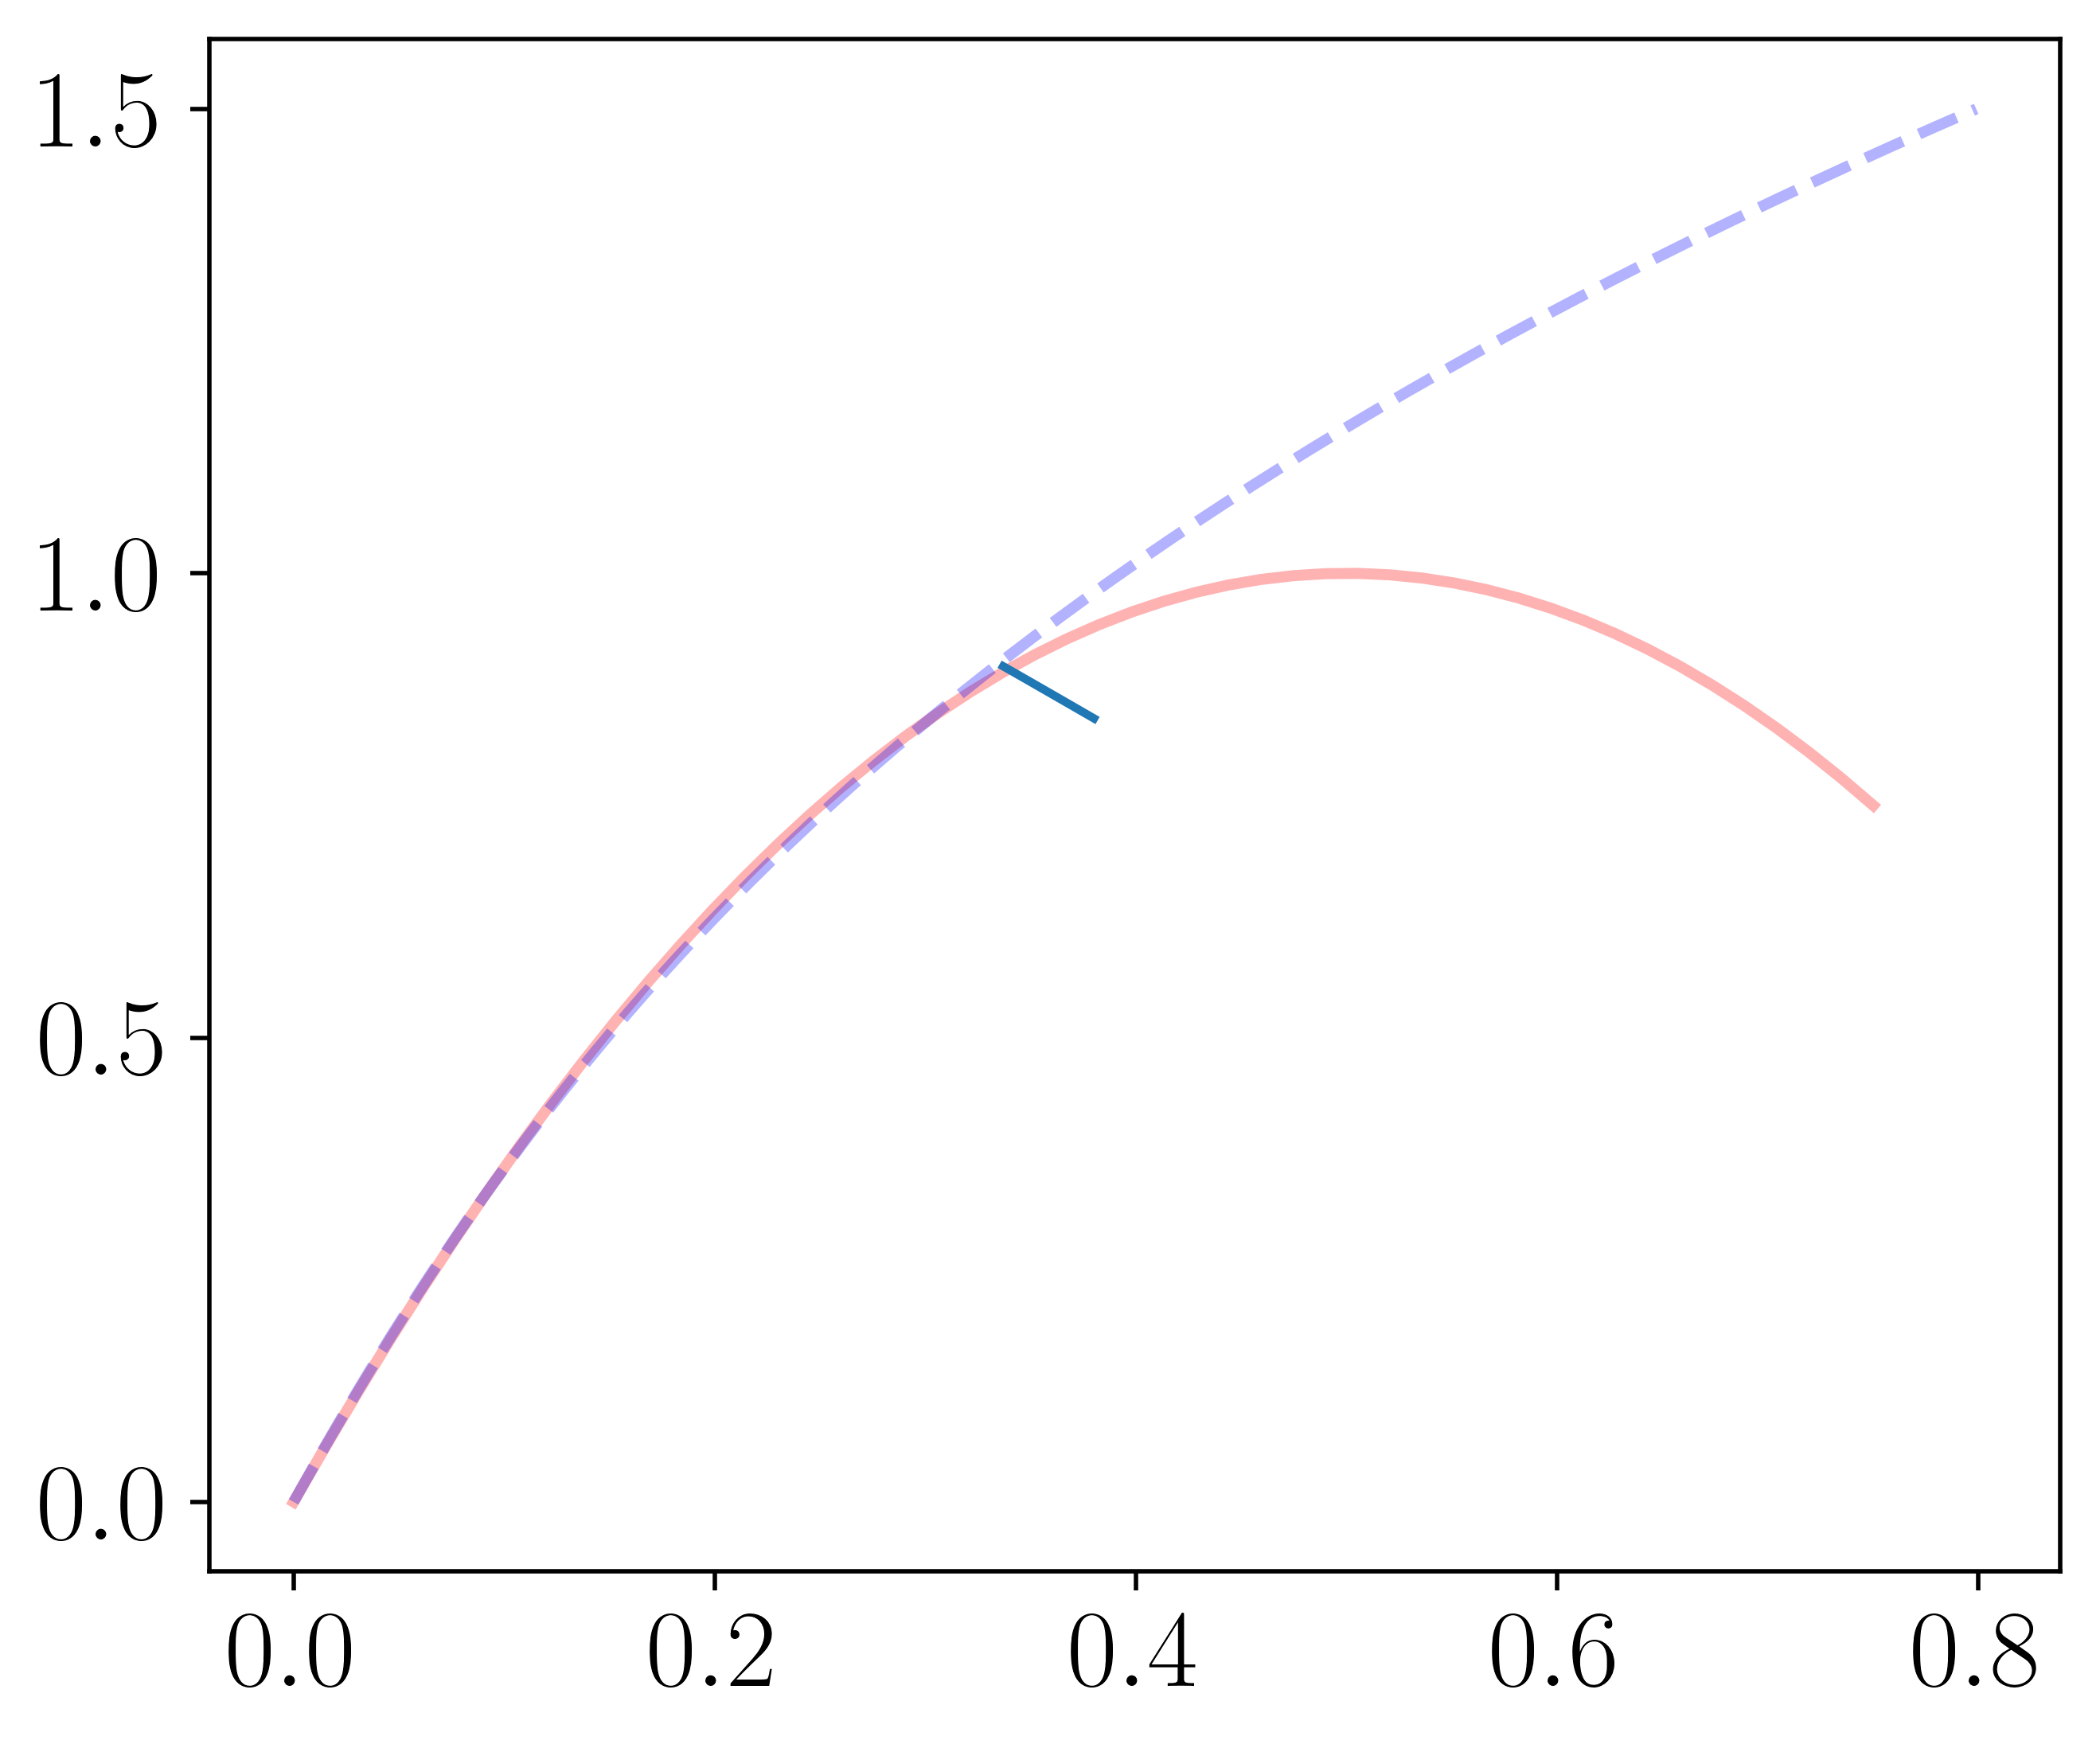

In [88]:
fig, ax = plt.subplots(figsize=(6, 5))

a_mom = np.linspace(0,0.75,50)
ct_mom = 4 * a_mom * (1 - a_mom)
ax.plot(a_mom, ct_mom, color='r',linewidth=2,alpha = 0.3, zorder = 1)

ct_mad = np.linspace(0,1.5,75)
k1 = 0.2460
k2 = 0.0586
k3 = 0.0883
a_mad = k3 * ct_mad**3 + k2 * ct_mad**2 + k1 * ct_mad
ax.plot(a_mad, ct_mad, '--', color='b',linewidth=2,alpha=0.3,zorder=2)

ax.plot(inds[0:-2],cts[0:-2])

In [20]:
shear_000  = [14,15,16,17,18,19,20]

train_data['ind_rotor'][shear_000]

array([0.35304437, 0.34362809, 0.33848581, 0.33744342, 0.34156468,
       0.34965288, 0.36229626])

In [21]:
train_data['cot_rotor'][shear_000]

array([0.88135055, 0.89040513, 0.89634211, 0.89916217, 0.89758297,
       0.89268261, 0.88485621])